# Integral som areal

__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

<hr/>

<img alt="Opphavsmann: 4C Lisens: Creative Commons Attribution-Share Alike 3.0 Unported" style="float: right; margin-left: 10px;" src="img/integral.png">

**Matematisk svarer beregning av flateinnholdet $S$ til integrasjon. Det arealet som begrenses ved x-aksen, to ordinater x = a og x = b og kurven y = f(x), er gitt ved det bestemte integral Kilde: [SNL](https://snl.no/areal)**

Dette kan skrives som $$S = \int_{a}^{b} f(x) dx$$

x-verdier:  [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y-verdier:  [0, 9, 16, 21, 24, 25, 24, 21, 16, 9, 0]


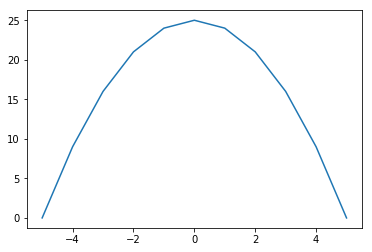

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Deinerer en funksjon
def f(x):
    return -x**2 + 25

x_verdier = []
y_verdier = []

for x in range(-5,6):
    x_verdier.append(x)
    y_verdier.append(f(x))

print("x-verdier: ", x_verdier)
print("y-verdier: ", y_verdier)

plt.plot(x_verdier, y_verdier)
plt.show()    

Legg inn fagtekst, eksempel og bilder med Riemannsummer her....

<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons Attribution-Share Alike 3.0 Unported" style="width: 200px; margin-left: 30px;" src="img/Riemannsum_left.gif">

By <a href="//commons.wikimedia.org/wiki/User:09glasgow09" title="User:09glasgow09">09glasgow09</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=7697902">Link</a>

<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons Attribution-Share Alike 3.0 Unported" style="width: 200px; margin-left: 30px;" src="img/Riemansum_1.gif">

Tekst om hva som skjer hvis rektangelene lages mindre?

<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons Attribution-Share Alike 3.0 Unported" style="width: 200px; margin-left: 30px;" src="img/Riemansum_2.gif">
User Sten André on sv.wikipedia [Public domain], <a href="https://commons.wikimedia.org/wiki/File:Riemansumma_2.gif">from Wikimedia Commons</a>

Når vi deler inn arealet under en funksjon på denne måten kalles det en Riemansum. Denne skrives slik: $$S = \sum_{n=0}^n f(x_n) \cdot \Delta x$$

In [13]:
# Beregner arealet under grafen numerisk.
A = 0
dx = 0.5 # bredden på hvert rektangel

for x in np.arange(-5,6,dx):
    A += f(x) * dx

print("Arealet under grafen er {}".format(A))

Arealet under grafen er 163.625
